## Zindi: Financial Inclusion in Africa

In [14]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from itertools import product
import matplotlib.pyplot as plt
import graphviz

In [3]:
#load data
train_data = pd.read_csv("Train.csv")
predict_data = pd.read_csv("Test.csv")
train_data


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [5]:
#check for null values
train_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
# get the target variables Y_1 and Y_2
Y = train_data['bank_account']
Y

0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23519     No
23520     No
23521     No
23522     No
23523     No
Name: bank_account, Length: 23524, dtype: object

In [8]:
X = train_data.drop(['bank_account'], axis = 1)
X

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-p

<AxesSubplot:xlabel='job_type', ylabel='count'>

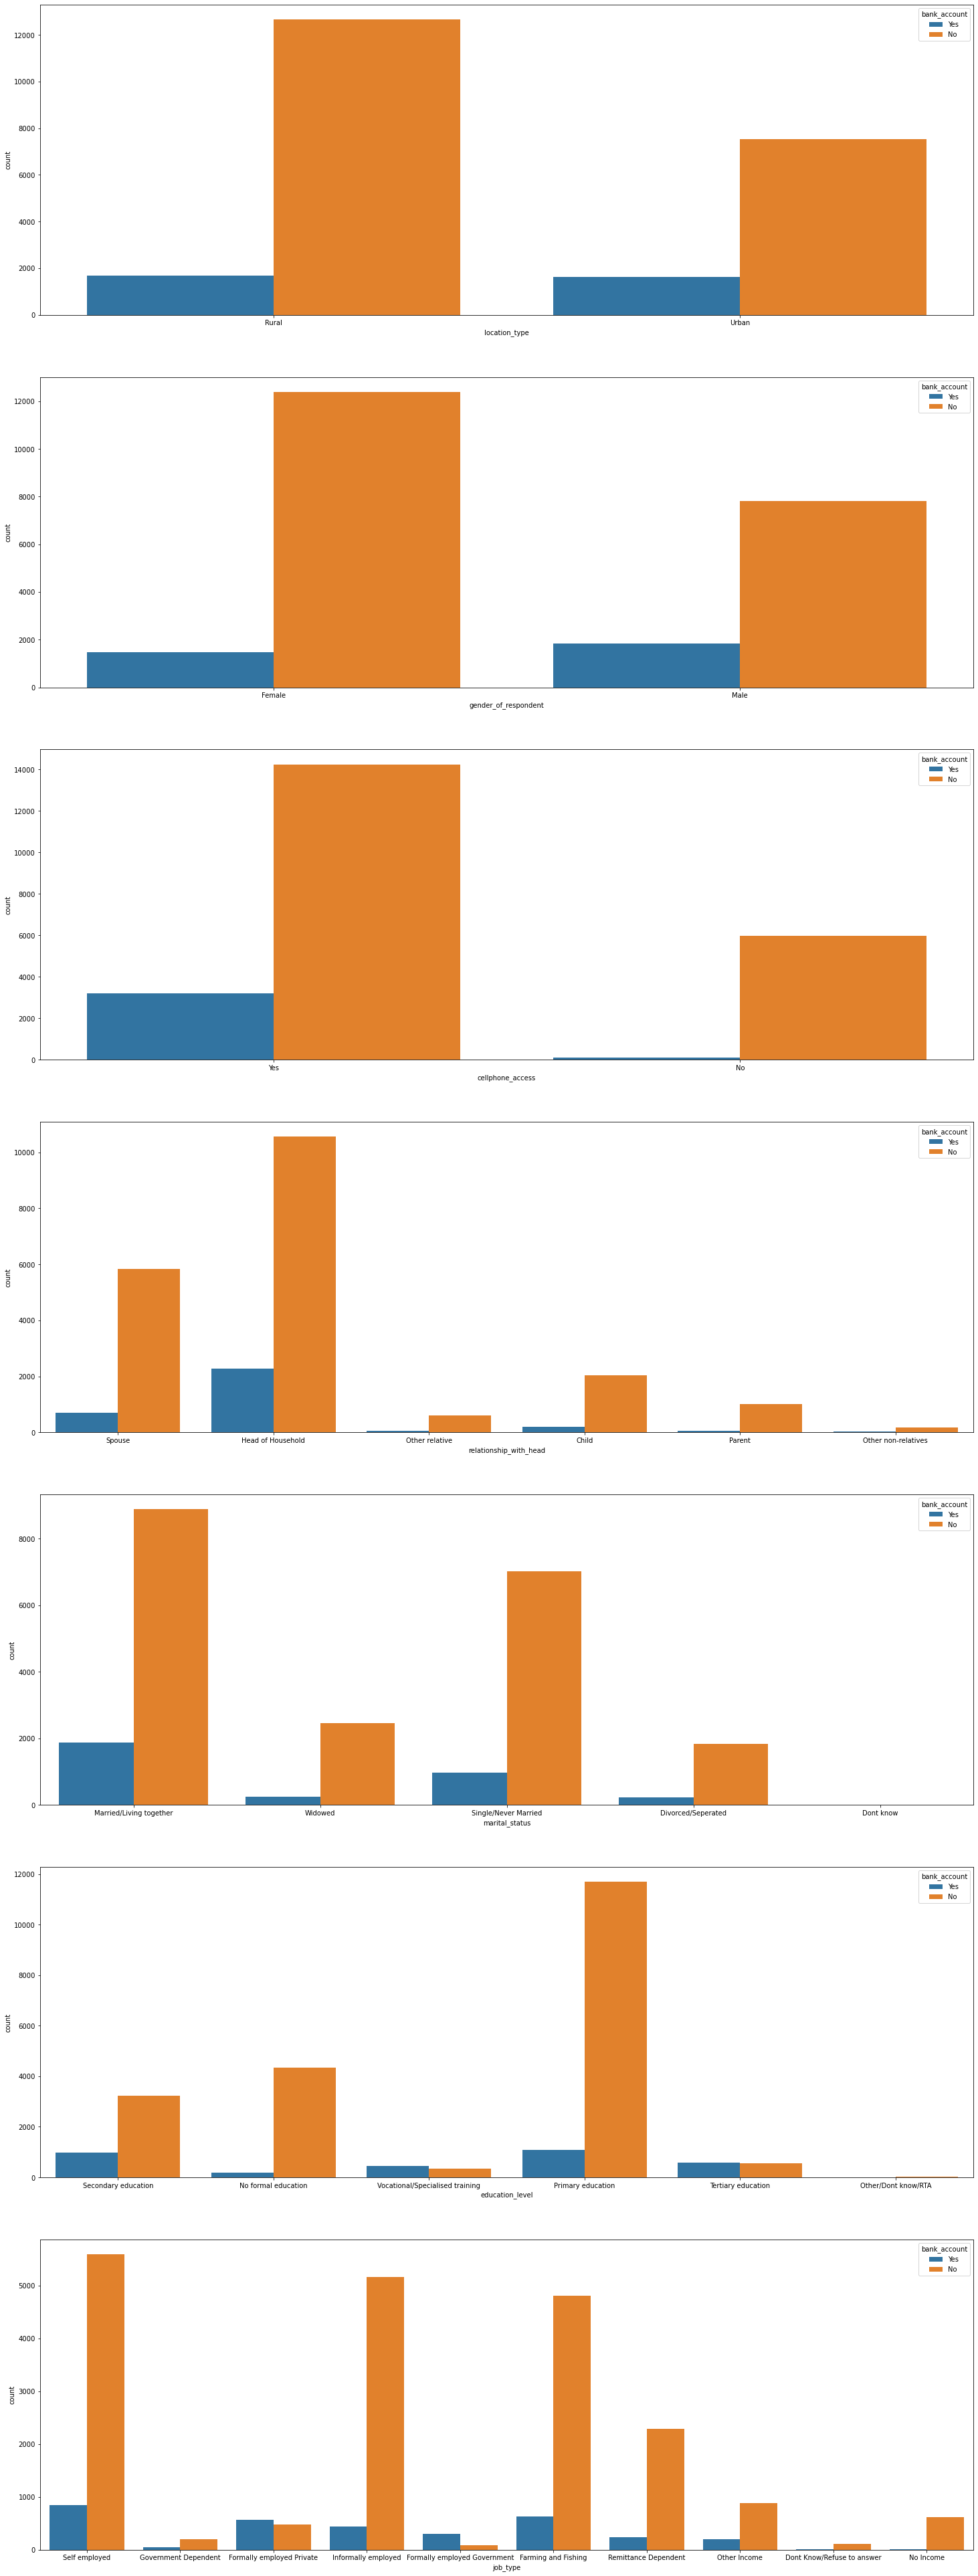

In [9]:
f, axes = plt.subplots(7, 1, figsize=[25, 70])

sns.countplot('location_type', hue= 'bank_account', data=train_data, ax=axes[0])
sns.countplot('gender_of_respondent', hue= 'bank_account', data=train_data, ax=axes[1])
sns.countplot('cellphone_access', hue= 'bank_account', data=train_data, ax=axes[2])
sns.countplot('relationship_with_head', hue= 'bank_account', data=train_data, ax=axes[3])
sns.countplot('marital_status', hue= 'bank_account', data=train_data, ax=axes[4])
sns.countplot('education_level', hue= 'bank_account', data=train_data, ax=axes[5])
sns.countplot('job_type', hue= 'bank_account', data=train_data, ax=axes[6])

In [10]:
# investigate the elements within each feature

for column in train_data:
    unique_vals = np.unique(train_data[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature country :4 -- ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
The number of values for feature year :3 -- [2016 2017 2018]
The number of values for feature uniqueid :8735
The number of values for feature bank_account :2 -- ['No' 'Yes']
The number of values for feature location_type :2 -- ['Rural' 'Urban']
The number of values for feature cellphone_access :2 -- ['No' 'Yes']
The number of values for feature household_size :20
The number of values for feature age_of_respondent :85
The number of values for feature gender_of_respondent :2 -- ['Female' 'Male']
The number of values for feature relationship_with_head :6 -- ['Child' 'Head of Household' 'Other non-relatives' 'Other relative'
 'Parent' 'Spouse']
The number of values for feature marital_status :5 -- ['Divorced/Seperated' 'Dont know' 'Married/Living together'
 'Single/Never Married' 'Widowed']
The number of values for feature education_level :6 -- ['No formal education' 'Other/Dont know/RTA' 'Primary educati

In [11]:
# convert the categoriccal data into numerical data
le = LabelEncoder()

# for train_data
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])
train_data['country'] = le.fit_transform(train_data['country'])
train_data['year'] = le.fit_transform(train_data['year'])
train_data['location_type'] = le.fit_transform(train_data['location_type'])
train_data['cellphone_access'] = le.fit_transform(train_data['cellphone_access'])
train_data['gender_of_respondent'] = le.fit_transform(train_data['gender_of_respondent'])
train_data['relationship_with_head'] = le.fit_transform(train_data['relationship_with_head'])
train_data['marital_status'] = le.fit_transform(train_data['marital_status'])
train_data['education_level'] = le.fit_transform(train_data['education_level'])
train_data['job_type'] = le.fit_transform(train_data['job_type'])


train_data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,0,2,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,0,2,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,0,2,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,0,2,uniqueid_5,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,uniqueid_2113,0,0,1,4,48,0,1,0,0,7
23520,3,2,uniqueid_2114,0,0,1,2,27,0,1,3,3,7
23521,3,2,uniqueid_2115,0,0,1,5,27,0,4,4,2,7
23522,3,2,uniqueid_2116,0,1,1,7,30,0,4,0,3,9


In [12]:
# Data Transformation for precition data


predict_data['country'] = le.fit_transform(predict_data['country'])
predict_data['year'] = le.fit_transform(predict_data['year'])
predict_data['location_type'] = le.fit_transform(predict_data['location_type'])
predict_data['cellphone_access'] = le.fit_transform(predict_data['cellphone_access'])
predict_data['gender_of_respondent'] = le.fit_transform(predict_data['gender_of_respondent'])
predict_data['relationship_with_head'] = le.fit_transform(predict_data['relationship_with_head'])
predict_data['marital_status'] = le.fit_transform(predict_data['marital_status'])
predict_data['education_level'] = le.fit_transform(predict_data['education_level'])
predict_data['job_type'] = le.fit_transform(predict_data['job_type'])
predict_data

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,uniqueid_6056,1,1,3,30,1,1,2,3,2
1,0,2,uniqueid_6060,1,1,7,51,1,1,2,5,3
2,0,2,uniqueid_6065,0,0,3,77,0,4,2,0,8
3,0,2,uniqueid_6072,0,0,6,39,0,1,2,2,8
4,0,2,uniqueid_6073,1,0,3,16,1,0,3,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,3,2,uniqueid_2998,0,0,2,62,0,5,2,2,9
10082,3,2,uniqueid_2999,1,1,8,42,1,1,2,2,9
10083,3,2,uniqueid_3000,1,1,1,39,1,1,3,3,7
10084,3,2,uniqueid_3001,0,1,6,28,0,5,2,2,9


In [15]:
X_train = train_data.drop(['uniqueid', 'bank_account'], axis=1)
Y_train = train_data['bank_account']

X_test = predict_data.drop(['uniqueid'], axis=1)

In [17]:
# Rescale our data
scaler = MinMaxScaler(feature_range=(0,1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.fit_transform(X_test)


In [19]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_rescaled, Y_train, stratify=Y_train, test_size=0.2, random_state=50)

In [25]:
# implement our basic random forest
Rf_model = RandomForestClassifier(max_depth=3, random_state=0)
Rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [26]:
Y_pred = Rf_model.predict(X_val)
cm = confusion_matrix(Y_val, Y_pred)
print(cm)
accuracy_score(Y_val, Y_pred)

[[4030   13]
 [ 597   65]]


0.8703506907545164